In [ ]:
# Colab Link: https://colab.research.google.com/drive/1vstOu0fY1mKh7nZ2eMlHy4SCJ6qzIBjt#scrollTo=A-VnHC8_ZiUW
# Colab Link: https://colab.research.google.com/drive/1vstOu0fY1mKh7nZ2eMlHy4SCJ6qzIBjt?usp=sharing

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# load the dataset
df_original = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
df_original

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [ ]:
# Create a new column Race and combine values with the same meaning
df_original['Race'] = np.where(df_original['Perceived_Race'] == 'White', 1,
         np.where(df_original['Perceived_Race'] == 'Black', 2, ''))

In [ ]:
# Create a column 'Age' and combine values with the same meaning
df_original['Age'] = np.where(df_original['Age_group__at_arrest_'] == 'Aged 17 years and under', 1,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 17 years and younger', 1,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 18 to 24 years', 2,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 25 to 34 years', 3,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 35 to 44 years', 4,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 45 to 54 years', 5,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 55 to 64 years', 6,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 65 and older', 7,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 65 years and older', 7,'')))))))))

In [ ]:
# Total number of black people
df_original[df_original['Perceived_Race'] == 'Black'].shape[0]

17526

In [ ]:
# Total number of white people
df_original[df_original['Perceived_Race'] == 'White'].shape[0]

27723

In [ ]:
df_original

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Race,Age
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,1,4
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,1,4
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,,4
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,2,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272,,3
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273,,4
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274,1,5
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275,,1


In [ ]:
df_original = df_original[df_original['Race'] != '']
df_original = df_original[df_original['Age'] != '']
df_original = df_original[df_original['StripSearch'] != '']
df_original

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Race,Age
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,1,4
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,1,4
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,2,3
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7,2,3
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65266,2021,Oct-Dec,1031653,6034963.0,320823,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65267,1,4
65268,2021,Oct-Dec,1028795,6018445.0,328838,Black,M,Aged 25 to 34 years,Not a youth,51,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65269,2,3
65269,2021,Oct-Dec,1046034,6054461.0,333136,White,M,Aged 45 to 54 years,Not a youth,XX,0,0,Police Category - Incident,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65270,1,5
65270,2021,Oct-Dec,1046034,6029720.0,311475,White,F,Aged 25 to 34 years,Not a youth,XX,0,0,Police Category - Incident,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65271,1,3


In [ ]:
# Total number of black people after dropping missing values
df_original[df_original['Perceived_Race'] == 'Black'].shape[0]

17518

In [ ]:
# Total number of white people after dropping missing values
df_original[df_original['Perceived_Race'] == 'White'].shape[0]

27713

In [ ]:
# Using DataFrame.copy() create new DataFrame(stripsearch, race, age)
df_new = df_original[['StripSearch', 'Race', 'Age']].copy()
df_new

,StripSearch,Race,Age
0,0,1,4
1,0,1,4
3,0,2,3
6,0,2,3
7,0,2,3
...,...,...,...
65266,0,1,4
65268,0,2,3
65269,0,1,5
65270,0,1,3


In [ ]:
# drop all missing values and display the new dataframe
df_new = df_new[df_new['Race'] != '']
df_new = df_new[df_new['Age'] != '']
df_new

,StripSearch,Race,Age
0,0,1,4
1,0,1,4
3,0,2,3
6,0,2,3
7,0,2,3
...,...,...,...
65266,0,1,4
65268,0,2,3
65269,0,1,5
65270,0,1,3


In [ ]:
df_new[df_new['Race'] == '1'].shape[0]

27713

In [ ]:
# Types of unique values in independent variable Race
df_new['Race'].unique()

array(['1', '2'], dtype=object)

In [ ]:
# Types of unique values in independent variable Age_group__at_arrest_ from original dataframe
df_original['Age_group__at_arrest_'].unique()

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 and older',
       'Aged 65 years and older', 'Aged 17 years and younger',
       'Aged 17 years and under'], dtype=object)

In [ ]:
# Types of unique values in independent variable Age group from new dataframe
df_new['Age'].unique()

array(['4', '3', '5', '6', '2', '7', '1'], dtype=object)

In [ ]:
# Number of times each unique value value appears
df_new['Age'].value_counts()

3    14623
4    11389
2     6430
5     6412
6     3248
1     2248
7      881
Name: Age, dtype: int64

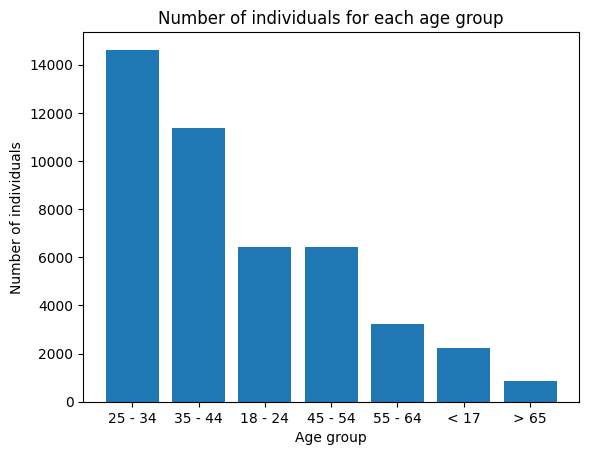

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# count number for each group
counts = df_new['Age'].value_counts()

# create bar chart
plt.bar(counts.index, counts.values)

# create title and axises label
plt.title('Number of individuals for each age group')
plt.xlabel('Age group')
plt.ylabel('Number of individuals')

# Set sepecific age group leables on the s-axis for the chart
# 1: < 17, 2: 18 - 24, 3: 25 - 34, 4: 35 - 44, 5: 45 - 54, 6: 55 - 64, 7: > 65]
tick_labels = ['25 - 34','35 - 44','18 - 24','45 - 54','55 - 64','< 17','> 65']

plt.xticks(range(len(tick_labels)), tick_labels)

# show the plot
plt.show()

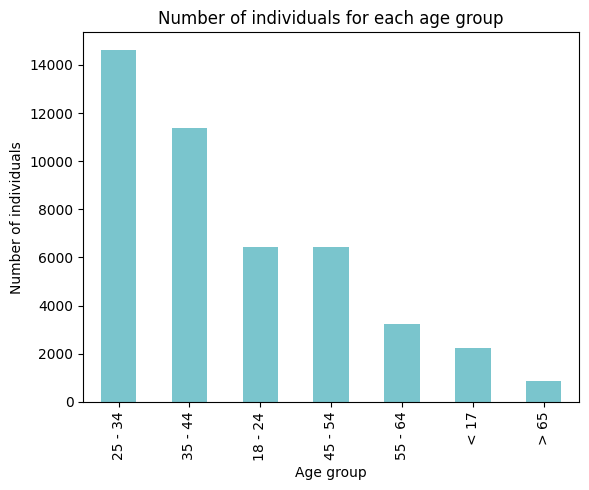

In [ ]:
# Replace age values with age categories 

df_new.Age.value_counts().plot(kind = 'bar', color = '#7AC5CD')
plt.title('Number of individuals for each age group')
plt.xlabel('Age group')
plt.ylabel('Number of individuals')

# Set sepecific age group leables on the s-axis for the chart
# 1: < 17, 2: 18 - 24, 3: 25 - 34, 4: 35 - 44, 5: 45 - 54, 6: 55 - 64, 7: > 65]
tick_labels = ['25 - 34','35 - 44','18 - 24','45 - 54','55 - 64','< 17','> 65']

plt.xticks(range(len(tick_labels)), tick_labels)
plt.show()

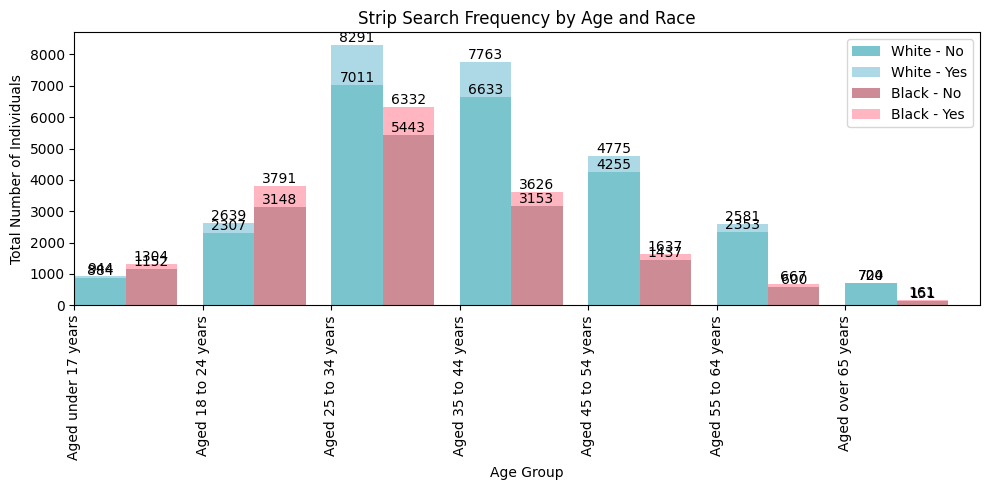

In [ ]:
# Replace age values with age categories 
df_new['Age_numeric'] = df_new['Age'].replace({'Aged under 17 years': 1,
                                                'Aged 18 to 24 years': 2,
                                                'Aged 25 to 34 years': 3,
                                                'Aged 35 to 44 years': 4,
                                                'Aged 45 to 54 years': 5,
                                                'Aged 55 to 64 years': 6,
                                                'Aged 65 and older': 7})
# Replace race and stripsearch values with meaningful names
df_new['Race'] = df_new['Race'].replace({1:'White', 2:'Black'})
df_new['StripSearch'] = df_new['StripSearch'].replace({0:'No', 1:'Yes'})

# Filter data from white and black races
white_df = df_new[df_new['Race'] == '1']
black_df = df_new[df_new['Race'] == '2']

# Group data by age and stripsearch
white_grouped = white_df.groupby(['Age_numeric', 'StripSearch'])['Age_numeric'].count()
black_grouped = black_df.groupby(['Age_numeric', 'StripSearch'])['Age_numeric'].count()

# Create pivot tables for white and black races
white_table = white_grouped.unstack('StripSearch')
black_table = black_grouped.unstack('StripSearch')

# Create a bar chart for white and black races
fig, ax = plt.subplots(figsize=(10, 5))
white_table.plot(kind='bar', stacked=True, ax=ax, width=0.4, position=0, color=['#7AC5CD', '#ADD8E6'])
black_table.plot(kind='bar', stacked=True, ax=ax, width=0.4, position=-1, color=['#CD8C95', '#FFB6C1'])

# Set sepecific age group leables on the s-axis for the chart
ax.set_xticklabels(['Aged under 17 years',
                    'Aged 18 to 24 years', 
                    'Aged 25 to 34 years', 
                    'Aged 35 to 44 years',
                    'Aged 45 to 54 years', 
                    'Aged 55 to 64 years', 
                    'Aged over 65 years'])

# Set axis titles for the chart                  
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Number of Individuals')
ax.set_title('Strip Search Frequency by Age and Race')
ax.legend(['White - No', 'White - Yes', 'Black - No', 'Black - Yes'])

# Display the total number for each type (can delete)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
# Power Analysis - Race(White and Black) and Strip Search

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
pd.options.display.max_columns = None

In [ ]:
def pooled_standard_deviation(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof = 1), np.var(sample2, ddof = 1)
    numerator = ((n1 - 1) * var1) + ((n2 - 1) * var2)
    denominator = n1 + n2 - 2
    return np.sqrt(numerator/denominator)

def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
#create race groups from dataset 
#creating two different datasets one with race = white and race = black
White_Race = df_original[df_original['Race']=='1']
Black_Race = df_original[df_original['Race']=='2']

White_StripSearch = White_Race['StripSearch']
Black_StripSearch = Black_Race['StripSearch']

In [ ]:
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(White_StripSearch,Black_StripSearch)
alpha = 0.05
power = 0.8
ratio_ =len(White_StripSearch)/len(Black_StripSearch) 
print('Effect size (Cohen\'s D) is',effect_size)
     

Effect size (Cohen's D) is -0.030270220713645792


In [ ]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Black_StripSearch') 
print('Actual size of Black_StripSearch:', len(Black_StripSearch))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for White_StripSearch')
print('Actual size of White_StripSearch:', len(White_StripSearch))

Sample Size of nobs1: 13981.417 needed for Black_StripSearch
Actual size of Black_StripSearch: 17518
Sample Size of nobs2: 22118.222 needed for White_StripSearch
Actual size of White_StripSearch: 27713


In [ ]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=17518, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


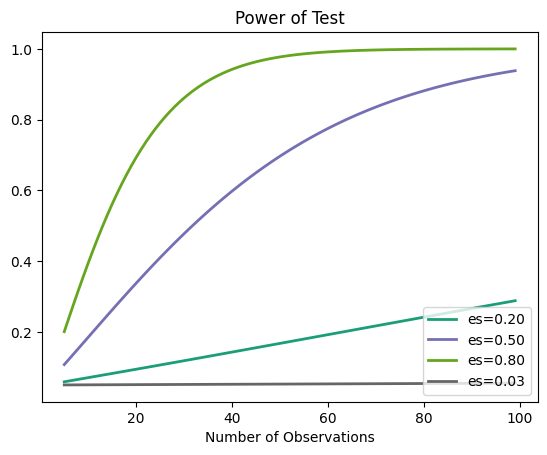

In [ ]:
#lastly power curve

effect_sizes = np.array([0.2, 0.5, 0.8, 0.030270220713645792])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
  
plt.show()

In [ ]:
# EDA - ttests

In [ ]:
white_df

,StripSearch,Race,Age,Age_numeric
0,No,1,4,4
1,No,1,4,4
23,No,1,3,3
25,No,1,4,4
26,No,1,4,4
...,...,...,...,...
65264,No,1,4,4
65266,No,1,4,4
65269,No,1,5,5
65270,No,1,3,3


In [ ]:
# Create a column 'Agecombine' and combine values with the same meaning
df_original['Agecombine'] = np.where(df_original['Age_group__at_arrest_'] == 'Aged 17 years and under', 8,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 17 years and younger', 8,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 18 to 24 years', 8,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 25 to 34 years', 9,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 35 to 44 years', 9,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 45 to 54 years', 9,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 55 to 64 years', 10,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 65 and older', 10,
         np.where(df_original['Age_group__at_arrest_'] == 'Aged 65 years and older', 10,'')))))))))

In [ ]:
df_original

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Race,Age,Agecombine
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,1,4,9
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,1,4,9
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,2,3,9
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7,2,3,9
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65266,2021,Oct-Dec,1031653,6034963.0,320823,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65267,1,4,9
65268,2021,Oct-Dec,1028795,6018445.0,328838,Black,M,Aged 25 to 34 years,Not a youth,51,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65269,2,3,9
65269,2021,Oct-Dec,1046034,6054461.0,333136,White,M,Aged 45 to 54 years,Not a youth,XX,0,0,Police Category - Incident,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65270,1,5,9
65270,2021,Oct-Dec,1046034,6029720.0,311475,White,F,Aged 25 to 34 years,Not a youth,XX,0,0,Police Category - Incident,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65271,1,3,9


In [ ]:
# ttest 1. white and black 
import scipy.stats as stats

white_df["StripSearch"] = pd.factorize(white_df["StripSearch"])[0]
black_df["StripSearch"] = pd.factorize(black_df["StripSearch"])[0]

a = white_df[white_df["Race"]== '1']["StripSearch"]
b = black_df[black_df["Race"]=='2']["StripSearch"]
t_value, p_value = stats.ttest_ind(a, b, equal_var=False)

print("t-value: ", t_value)
print("p-value: ", p_value)

t-value:  -3.113181378896259
p-value:  0.0018522582147967232


<ipython-input-238-e2b60e5106a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_df["StripSearch"] = pd.factorize(white_df["StripSearch"])[0]
<ipython-input-238-e2b60e5106a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_df["StripSearch"] = pd.factorize(black_df["StripSearch"])[0]


In [ ]:
# ttest 2. Black Female and White Female
Female = df_original[df_original['Sex'] == 'F']
black_Female = Female[Female['Race'] == '2']
white_female = Female[Female['Race'] == '1']

p_value = stats.ttest_ind(black_Female['StripSearch'], white_female['StripSearch'], equal_var=False)
p_value

Ttest_indResult(statistic=-6.280214636222416, pvalue=3.5837103373972466e-10)

In [ ]:
# ttest 3. Black male and White male
import scipy.stats as stats

male = df_original[df_original['Sex'] == 'M']
black_male = male[male['Race'] == '2']
white_male = male[male['Race'] == '1']

p_value = stats.ttest_ind(black_male['StripSearch'], white_male['StripSearch'], equal_var=False)
p_value

Ttest_indResult(statistic=5.549927245466153, pvalue=2.8821821358557945e-08)

In [ ]:
# ttest 4. age group 8(< 24) and age group 9(25 - 54)
import scipy.stats as stats

young_age_group = df_original[df_original["Agecombine"]== '8']["StripSearch"]
median_age_group = df_original[df_original["Agecombine"]=='9']["StripSearch"]
print(young_age_group)
t_value, p_value = stats.ttest_ind(young_age_group, median_age_group, equal_var=False)

print("t-value: ", t_value)
print("p-value: ", p_value)

61       0
64       0
66       0
82       0
83       1
        ..
65233    0
65242    0
65243    0
65252    0
65257    0
Name: StripSearch, Length: 8678, dtype: int64
t-value:  -0.4224885949377878
p-value:  0.672675036054319


In [ ]:
# ttest 5. age group 8(< 24) and age group 10(> 55)
import scipy.stats as stats

young_age_group = df_original[df_original["Agecombine"]== '8']["StripSearch"]
older_age_group = df_original[df_original["Agecombine"]=='10']["StripSearch"]
print(young_age_group)
t_value, p_value = stats.ttest_ind(young_age_group, older_age_group, equal_var=False)

print("t-value: ", t_value)
print("p-value: ", p_value)

61       0
64       0
66       0
82       0
83       1
        ..
65233    0
65242    0
65243    0
65252    0
65257    0
Name: StripSearch, Length: 8678, dtype: int64
t-value:  10.607894003892905
p-value:  3.7513735733912976e-26


In [ ]:
# ttest 6. age group 9(25 - 54) and age group 10(> 55)
import scipy.stats as stats

median_age_group = df_original[df_original["Agecombine"]== '9']["StripSearch"]
older_age_group = df_original[df_original["Agecombine"]=='10']["StripSearch"]
print(median_age_group)
t_value, p_value = stats.ttest_ind(median_age_group, older_age_group, equal_var=False)

print("t-value: ", t_value)
print("p-value: ", p_value)

0        0
1        0
3        0
6        0
7        0
        ..
65266    0
65268    0
65269    0
65270    0
65273    0
Name: StripSearch, Length: 32424, dtype: int64
t-value:  13.251187699160623
p-value:  1.57929947073321e-39


In [ ]:
# ANCOVA Test

In [ ]:
print(df_original.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
df_original['Age'] = pd.to_numeric(df_original['Age'])

In [ ]:
df_original['Race_string'] = df_original['Race'].astype(str)

In [ ]:
from pingouin import ancova
ancova(data = df_original, dv = 'StripSearch', covar = 'Age', between = 'Race')

,Source,SS,DF,F,p-unc,np2
0,Race,0.095221,1,0.829141,3.625259e-01,0.000018
1,Age,8.831617,1,76.901609,1.858116e-18,0.001697
2,Residual,5194.122728,45228,NaN,NaN,NaN


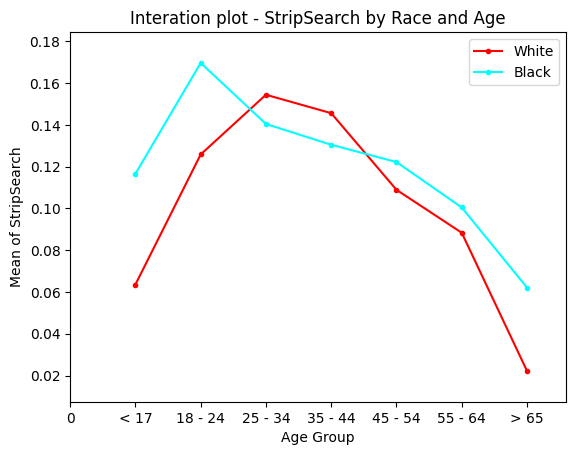

In [ ]:
# interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x = df_original['Age'], trace = df_original['Race'], response = df_original['StripSearch'])
plt.title('Interation plot - StripSearch by Race and Age')
lines = plt.gca().get_lines()  # get the lines that were plotted
lines[0].set_label('White')
lines[1].set_label('Black')
plt.legend()

new_ticks = ['0','< 17', '18 - 24', '25 - 34', '35 - 44', '45 - 54','55 - 64','> 65']
plt.xticks(range(len(new_ticks)),new_ticks)
plt.xlabel('Age Group')
plt.ylabel('Mean of StripSearch')
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Fit the ANCOVA model
model = ols('StripSearch ~ Race + Age', data=df_original).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     43.38
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.51e-19
Time:                        01:24:43   Log-Likelihood:                -15234.
No. Observations:               45231   AIC:                         3.047e+04
Df Residuals:                   45228   BIC:                         3.050e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1703      0.005     32.987      0.0

In [ ]:
# Logistic Regression Model

In [ ]:
df_original['StripSearch'].unique()

array([0, 1])

In [ ]:
df_original['Age'].unique()

array([4, 3, 5, 6, 2, 7, 1])

In [ ]:
df_original['Youth_at_arrest__under_18_years'] = df_original['Youth_at_arrest__under_18_years'].replace({
    'Youth (aged 17 and younger)': 'Youth',
    'Youth (aged 17 years and under)': 'Youth'
})

In [ ]:
df_original['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth'], dtype=object)

In [ ]:
df_original['Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [ ]:
df_original = df_original[df_original['Sex'] != 'U'].copy()

In [ ]:
df_original['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
# Select the indep of our DataFrame that we will use as the predictors in our models (age, sex and race)
x = df_original[['Age','Race','Sex']]

# Select the response column 
y = df_original['StripSearch']

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

#building the model with statsmodels
import statsmodels.formula.api as smf
import pandas as pd

# Create the formula string 
all_columns = ' + '.join(x)
formula = 'StripSearch ~' + all_columns
print("StripSearch: ", formula, "\n")

trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
reg_1 = smf.logit(formula, data=trainingdata).fit()

StripSearch:  StripSearch ~Age + Race + Sex 

Optimization terminated successfully.
         Current function value: 0.389031
         Iterations 6


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45226 entries, 0 to 65273
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     45226 non-null  int64 
 1   Race    45226 non-null  object
 2   Sex     45226 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                33919
Model:                          Logit   Df Residuals:                    33915
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                0.004295
Time:                        01:24:44   Log-Likelihood:                -13196.
converged:                       True   LL-Null:                       -13252.
Covariance Type:            nonrobust   LLR p-value:                 1.641e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7063      0.060    -28.502      0.000      -1.824      -1.589
Race[T.2]      0.0165      0.034      0.488      0.625      -0.050       0.083
Sex[T.M]       0.2494      0.042      5.880      0.000       0.166       0.333
Age           -0.1089      0.013     -8.605      0.000      -0.134      -0.084
==============================================================================
"""

In [ ]:
# odds ratio
np.exp(reg_1.params)

Intercept    0.181538
Race[T.2]    1.016666
Sex[T.M]     1.283244
Age          0.896793
dtype: float64

In [ ]:
# To see the CI and OR of the parameters
params = reg_1.params
conf = reg_1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.161439,0.204139,0.181538
Race[T.2],0.951380,1.086433,1.016666
Sex[T.M],1.180888,1.394473,1.283244
Age,0.874816,0.919322,0.896793


In [ ]:
# Predict responses 
pred_1 = reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

from collections import Counter
# Count the occurrences of each value
counter = Counter(prediction_1)
# Print the distinct values and their counts
for value, count in counter.items():
    print(f"{value}: {count}")

0: 11307


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[9794    0]
 [1513    0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

fscore = f1_score(y_test,prediction_1)
print('F1 score: '+ str(fscore))


Test accuracy =  0.8661890864066507
F1 score: 0.0


In [ ]:
reg = smf.logit('StripSearch ~ Race', data=df_original).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.391318
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                45226
Model:                          Logit   Df Residuals:                    45224
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:               0.0002751
Time:                        01:24:46   Log-Likelihood:                -17698.
converged:                       True   LL-Null:                       -17703.
Covariance Type:            nonrobust   LLR p-value:                  0.001802
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9125      0.018   -106.605      0.000      -1.948      -1.877
Race[T.2]      0.0884      0.

In [ ]:
#odds ratio
reg = smf.logit('StripSearch ~ Race', data=df_original).fit()
np.exp(reg.params)    

Optimization terminated successfully.
         Current function value: 0.391318
         Iterations 6


Intercept    0.147709
Race[T.2]    1.092436
dtype: float64

In [ ]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.142606,0.152996,0.147709
Race[T.2],1.033560,1.154666,1.092436


In [ ]:
reg = smf.logit('StripSearch ~ Age', data=df_original).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.390468
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                45226
Model:                          Logit   Df Residuals:                    45224
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                0.002447
Time:                        01:24:47   Log-Likelihood:                -17659.
converged:                       True   LL-Null:                       -17703.
Covariance Type:            nonrobust   LLR p-value:                 1.306e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5323      0.039    -39.081      0.000      -1.609      -1.455
Age           -0.0980      0.

In [ ]:
reg = smf.logit('StripSearch ~ Sex', data=df_original).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.390967
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                45226
Model:                          Logit   Df Residuals:                    45224
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                0.001172
Time:                        01:24:49   Log-Likelihood:                -17682.
converged:                       True   LL-Null:                       -17703.
Covariance Type:            nonrobust   LLR p-value:                 1.178e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0641      0.033    -62.492      0.000      -2.129      -1.999
Sex[T.M]       0.2301      0.

In [ ]:
reg = smf.logit('StripSearch ~ Age + Race + Sex', data=df_original).fit()
print(reg.summary())
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Optimization terminated successfully.
         Current function value: 0.389932
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                45226
Model:                          Logit   Df Residuals:                    45222
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                0.003815
Time:                        01:24:50   Log-Likelihood:                -17635.
converged:                       True   LL-Null:                       -17703.
Covariance Type:            nonrobust   LLR p-value:                 4.373e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7263      0.052    -33.298      0.000      -1.828      -1.625
Race[T.2]      0.0100      0.

,Lower CI,Upper CI,OR
Intercept,0.160753,0.196978,0.177946
Race[T.2],0.953785,1.069718,1.010090
Sex[T.M],1.192276,1.376082,1.280886
Age,0.884721,0.923544,0.903924


In [ ]:
df_final = pd.get_dummies(df_original, columns=['Age', 'Race','Sex'], drop_first=True)
df_final.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Agecombine,Race_string,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Race_2,Sex_M
0,2020,July-Sept,1005907,6017884.0,326622,White,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,9,1,0,0,1,0,0,0,0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,9,1,0,0,1,0,0,0,0,1
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,9,2,0,1,0,0,0,0,1,1
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,Aged 25 to 34 years,Not a youth,52,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7,9,2,0,1,0,0,0,0,1,1
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,Aged 25 to 34 years,Not a youth,XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8,9,2,0,1,0,0,0,0,1,1


In [ ]:
# Prediction Interval

Optimization terminated successfully.
         Current function value: 0.390468
         Iterations 6


Text(0.5, 1.0, 'Logistic Regression Prediction Intervals')

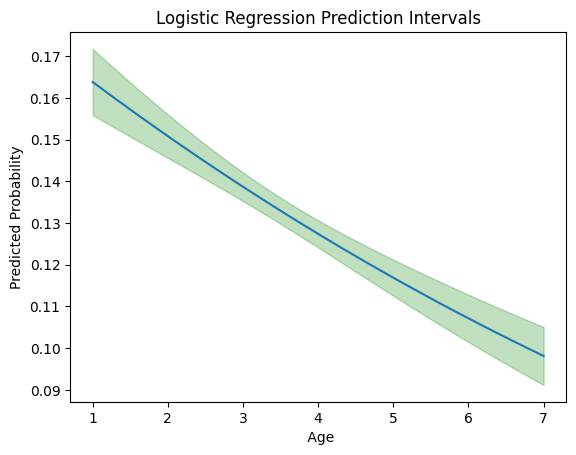

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns


# choose Age as the IV
modf = sm.Logit.from_formula('StripSearch ~ Age ', df_original)
resf = modf.fit()
mef = resf.get_margeff()

resf.summary()
mef.summary()
from scipy import stats

Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = resf.params.values.reshape(-1, 1)
V_ = resf.cov_params().values

def var_π(x, β, V_):
    #      λ(z)**s * x.T @ V_ @ x
    prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x) 
    return prob

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((500, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

xx = sm.add_constant(np.linspace(df_original.Age .min(), df_original.Age .max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),
                 alpha=.25, color='g')
plt.xlabel(' Age')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Prediction Intervals')
     